## Two-body Problem

In [1]:
using Plots; gr(legend=true,dpi=800); 
using LinearAlgebra
using BenchmarkTools
using Printf
using Revise
using CDDP

In [3]:
includet("../src/models/TwoBody.jl")
model = TwoBody()
x_dim, u_dim = model.x_dim, model.u_dim
;


In [4]:
# tf = 8.162395951775
tf = 8.162395951775
tN = 500
dt = (tf - 0.0)/tN
x_init = model.x_init
x_final = model.x_final;
;

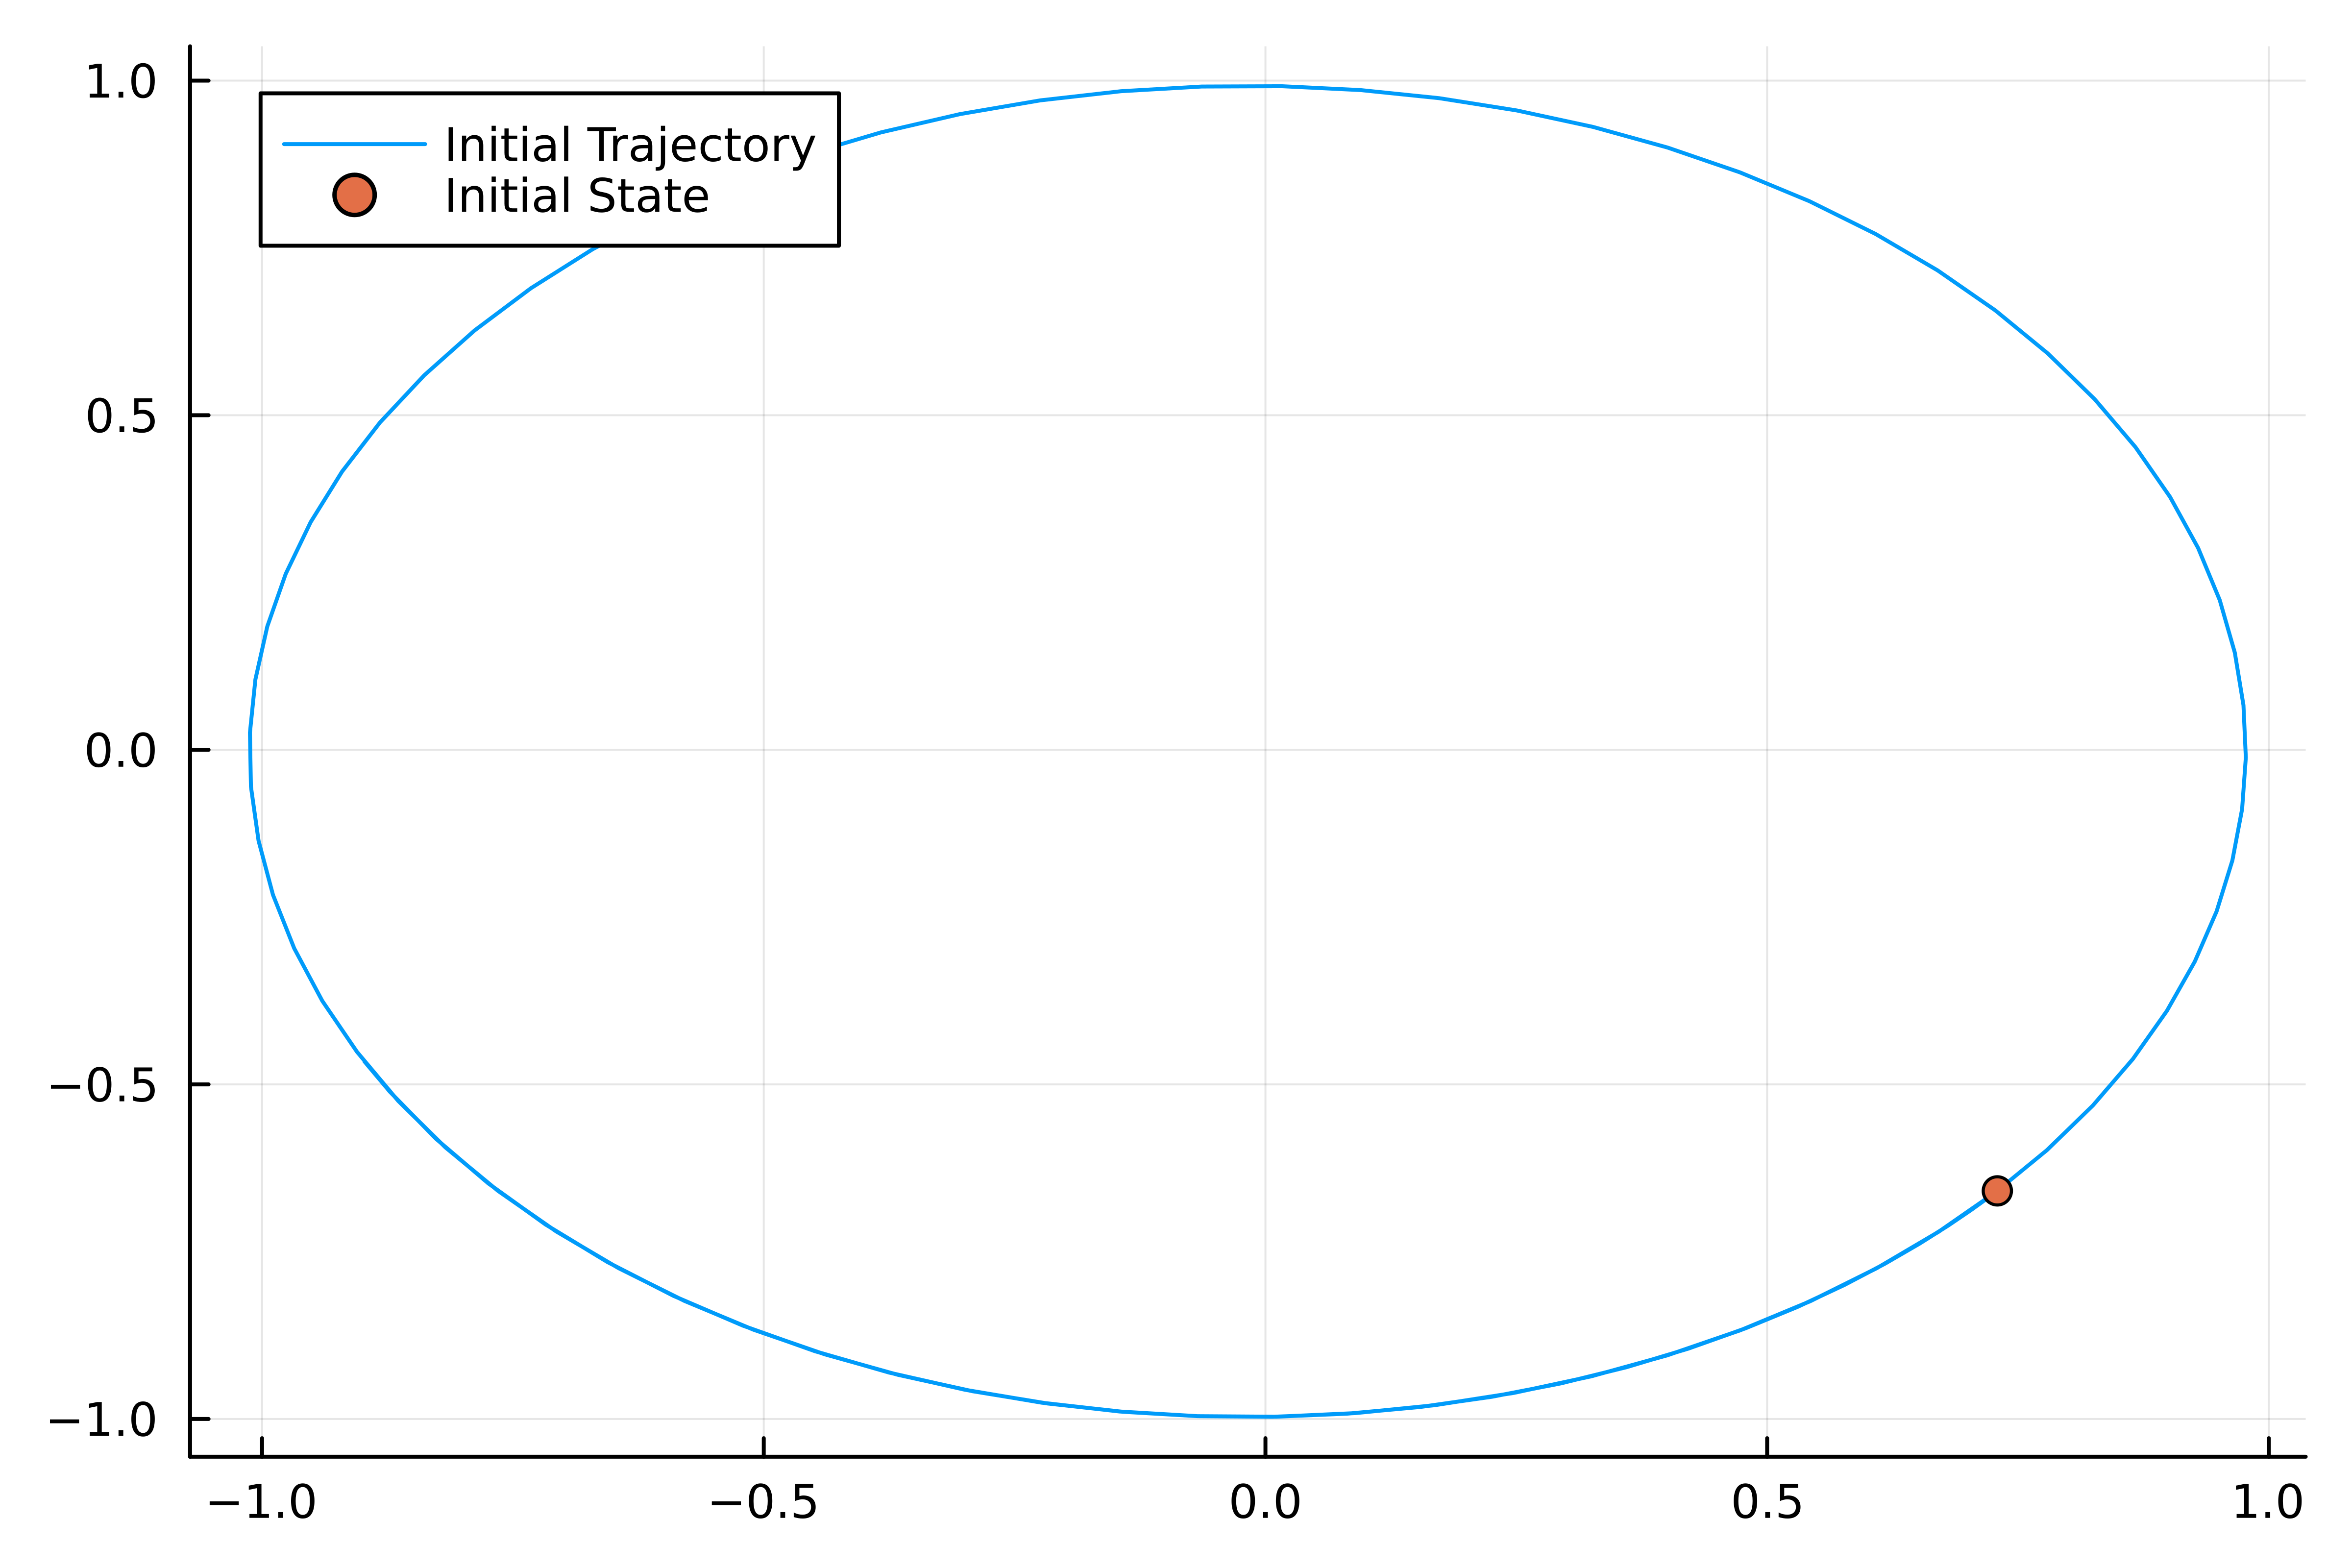

In [5]:
X0, U0 = initialize_trajectory(model)
plot(X0[2,:],X0[1,:],label="Initial Trajectory")
scatter!((x_init[2],x_init[1]),label="Initial State")

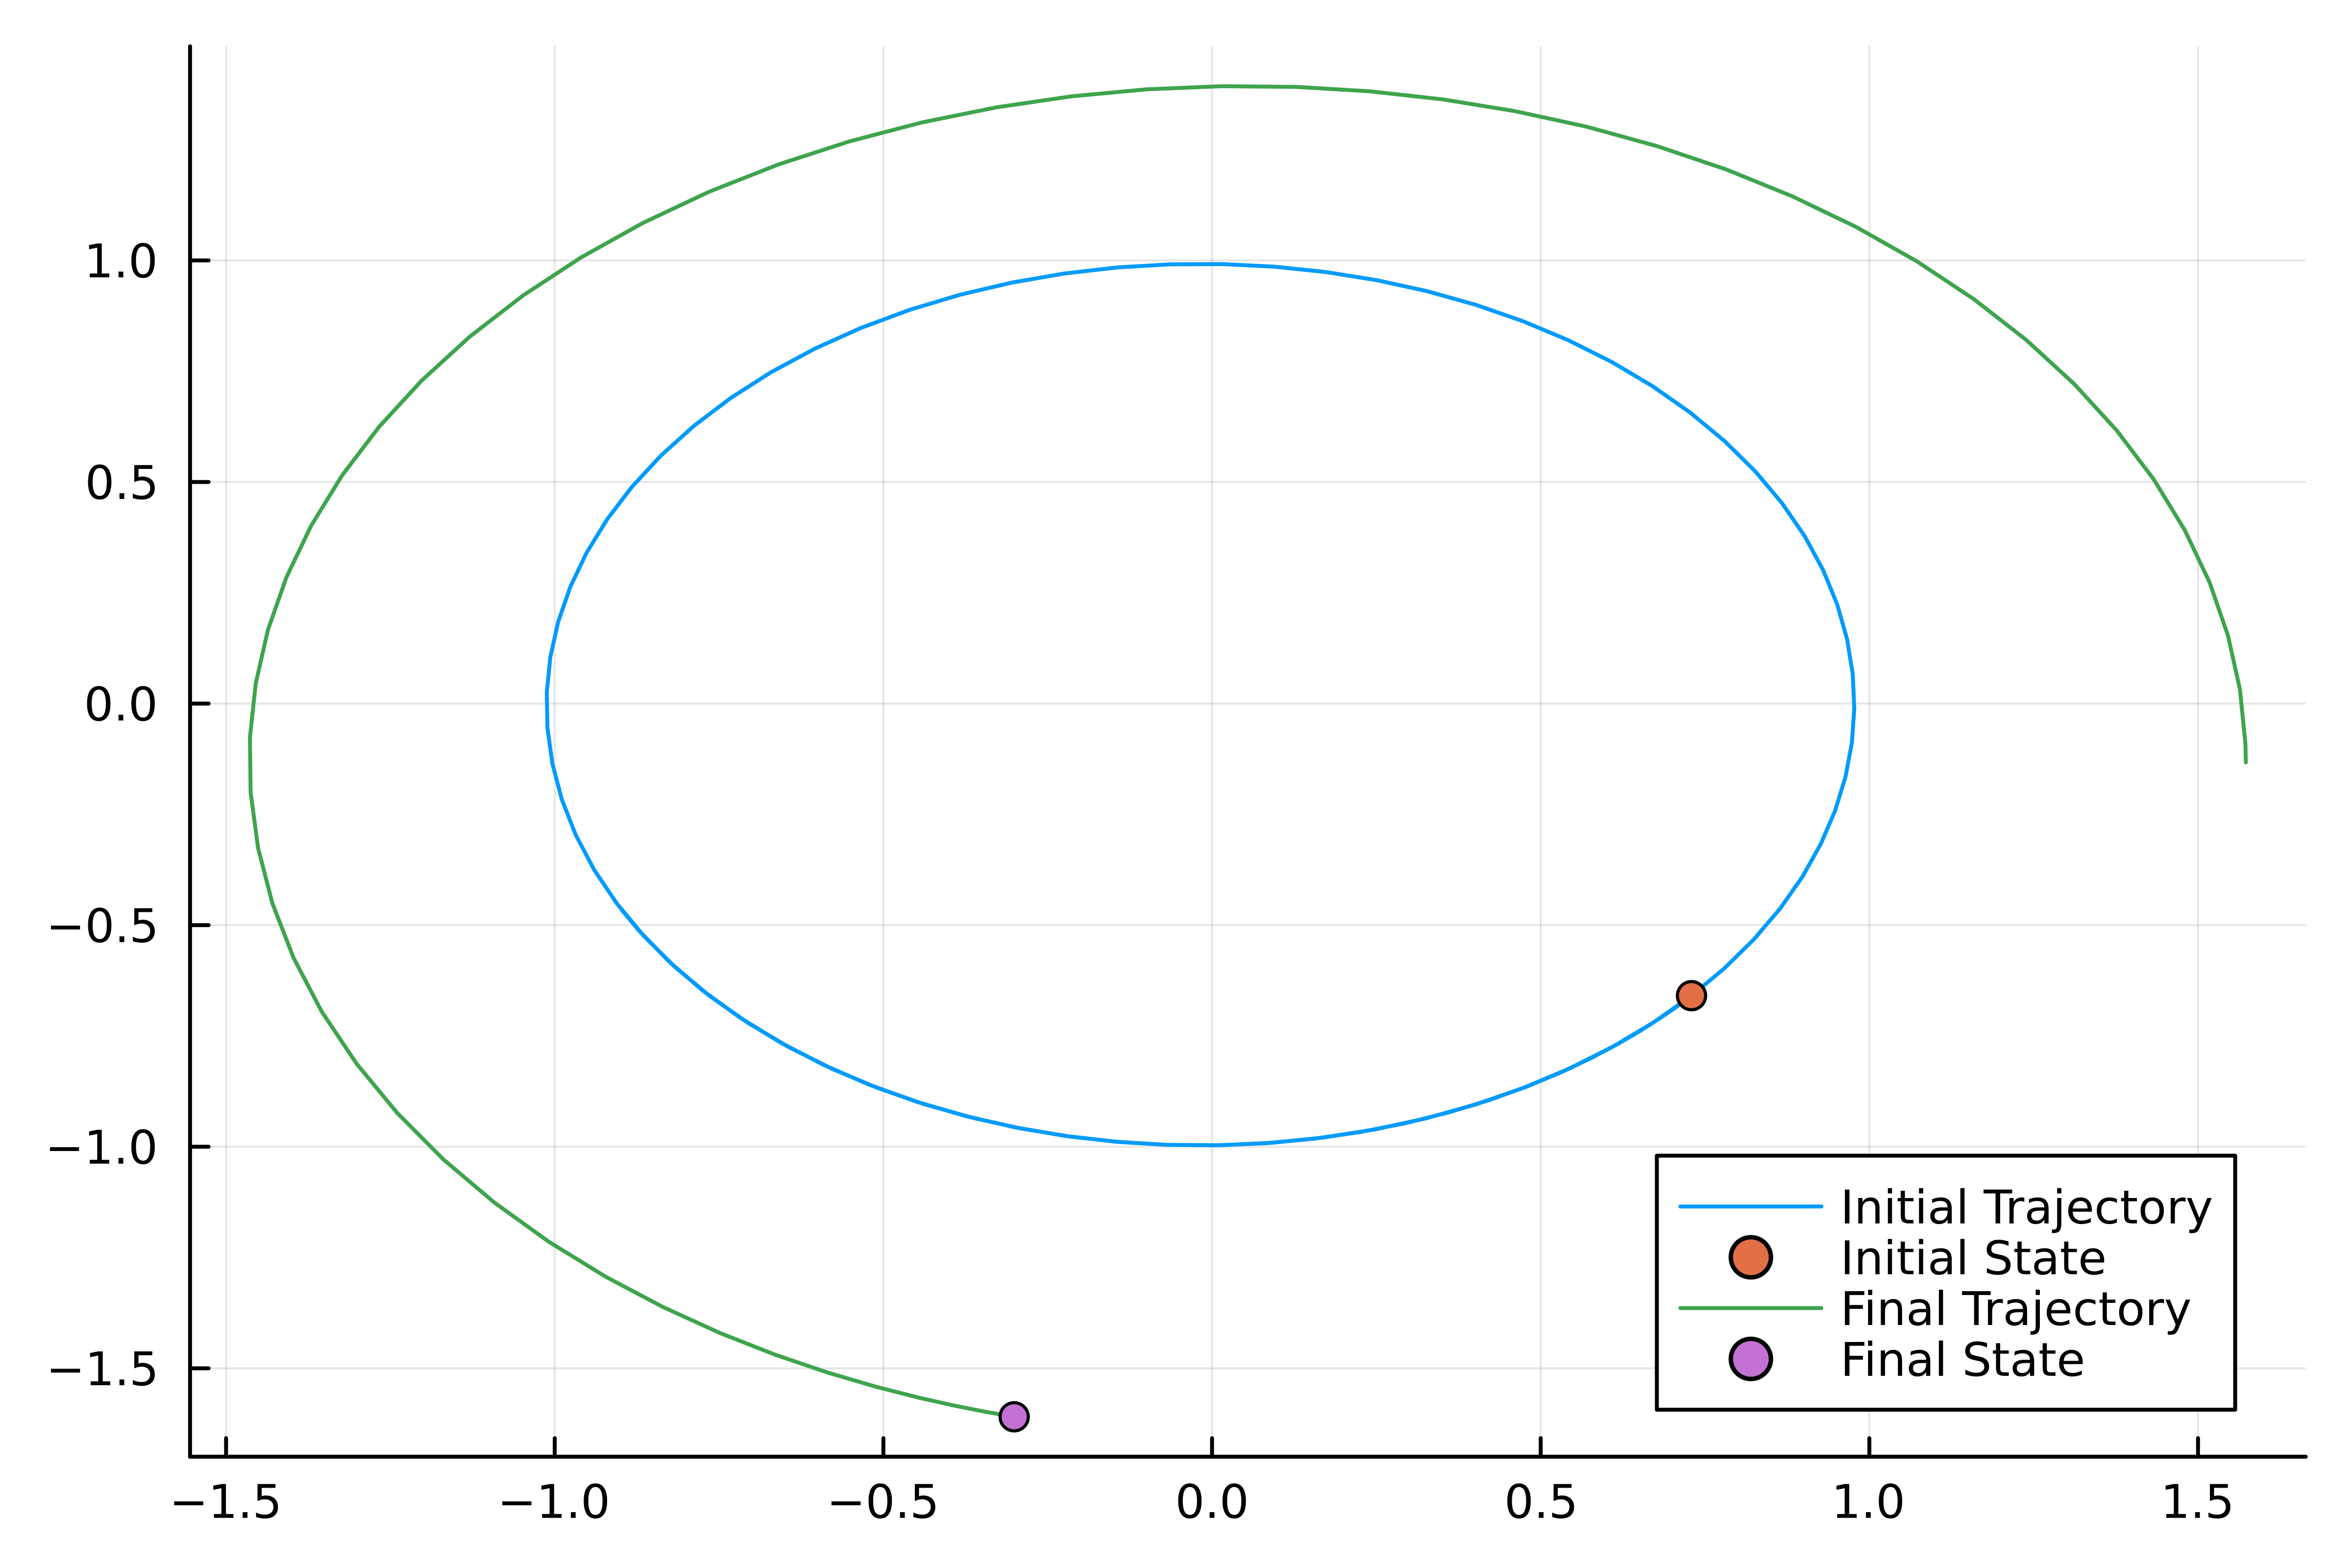

In [6]:
Xf, Uf = initialize_trajectory(model, x_init=x_final)
plot!(Xf[2,:],Xf[1,:],label="Final Trajectory")
scatter!((x_final[2],x_final[1]),label="Final State")

In [7]:
function ell_cost(
    x::Vector,
    u::Vector,
    x_ref::Vector{Float64};
)
    Q = zeros(7, 7)
    # Q = zeros(6, 6)
    R = Diagonal(1e-1*[1; 1; 1])
    return transpose(x - x_ref) * Q * (x - x_ref) + transpose(u) * R * u
end

function phi_cost(
    x::Vector,
    x_final::Vector{Float64};
)
    Qf = Diagonal(1e+3*[1; 1; 1; 1; 1; 1; 1])
    # Qf = Diagonal(1e+4*[1; 1; 1; 1; 1; 1])
    return transpose(x - x_final) * Qf * (x - x_final)
end
;

In [8]:
prob = iLQRProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, x_init, x_final, nothing)
sol = solve_ilqr(prob, reg_param1=1e-5,reg_param2=1e+3, max_ite=50)
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_ilqr, U_ilqr, J_ilqr, gains_ilqr = sol.X, sol.U, sol.J, sol.gains;

**************************************************************************************
>>> Start iLQR Problem Solver 
**************************************************************************************
iter    objective   inf_pr     inf_du   lg(mu)   |d|   lg(rg)  alpha_du   alpha_pr   ls
                


0       2302.210934,  
                
1       2302.210934,  
                


2       2302.210934,  
                
3       2302.210934,  
                


4       2302.210934,  
                
5       2302.210934,  
                


6       2302.210934,  
                
7       2302.210934,  
                


8       2060.604965,  
                
9       316.290779,  
                
iter    objective   inf_pr     inf_du   lg(mu)   |d|   lg(rg)  alpha_du   alpha_pr   ls
                
10       316.290779,  
                


11       316.290779,  
                
12       316.290779,  
                


13       316.290779,  
                
14       316.290779,  
                


15       316.290779,  
                
16       316.290779,  
                


17       316.290779,  
                
18       316.290779,  
                


19       316.290779,  
                
iter    objective   inf_pr     inf_du   lg(mu)   |d|   lg(rg)  alpha_du   alpha_pr   ls
                
20       316.290779,  
                
21       316.290779,  
                


22       316.290779,  
                
23       316.290779,  
                


24       316.290779,  
                
25       316.290779,  
                


26       316.290779,  
                
27       316.290779,  
                


28       316.290779,  
                
29       316.290779,  
                


iter    objective   inf_pr     inf_du   lg(mu)   |d|   lg(rg)  alpha_du   alpha_pr   ls
                
30       316.290779,  
                


31       316.290779,  
                
32       316.290779,  
                


33       316.290779,  
                
34       316.290779,  
                


35       316.290779,  
                
36       316.290779,  
                


37       316.290779,  
                
38       316.290779,  
                


39       316.290779,  
                
iter    objective   inf_pr     inf_du   lg(mu)   |d|   lg(rg)  alpha_du   alpha_pr   ls
                
40       316.290779,  
                
41       316.290779,  
                


42       316.290779,  
                
43       316.290779,  
                


44       316.290779,  
                
45       316.290779,  
                


46       316.290779,  
                
47       316.290779,  
                


48       316.290779,  
                
49       316.290779,  
                


**************************************************************************************
>>> Successfully Finished iLQR Problem Solver <<< 
**************************************************************************************


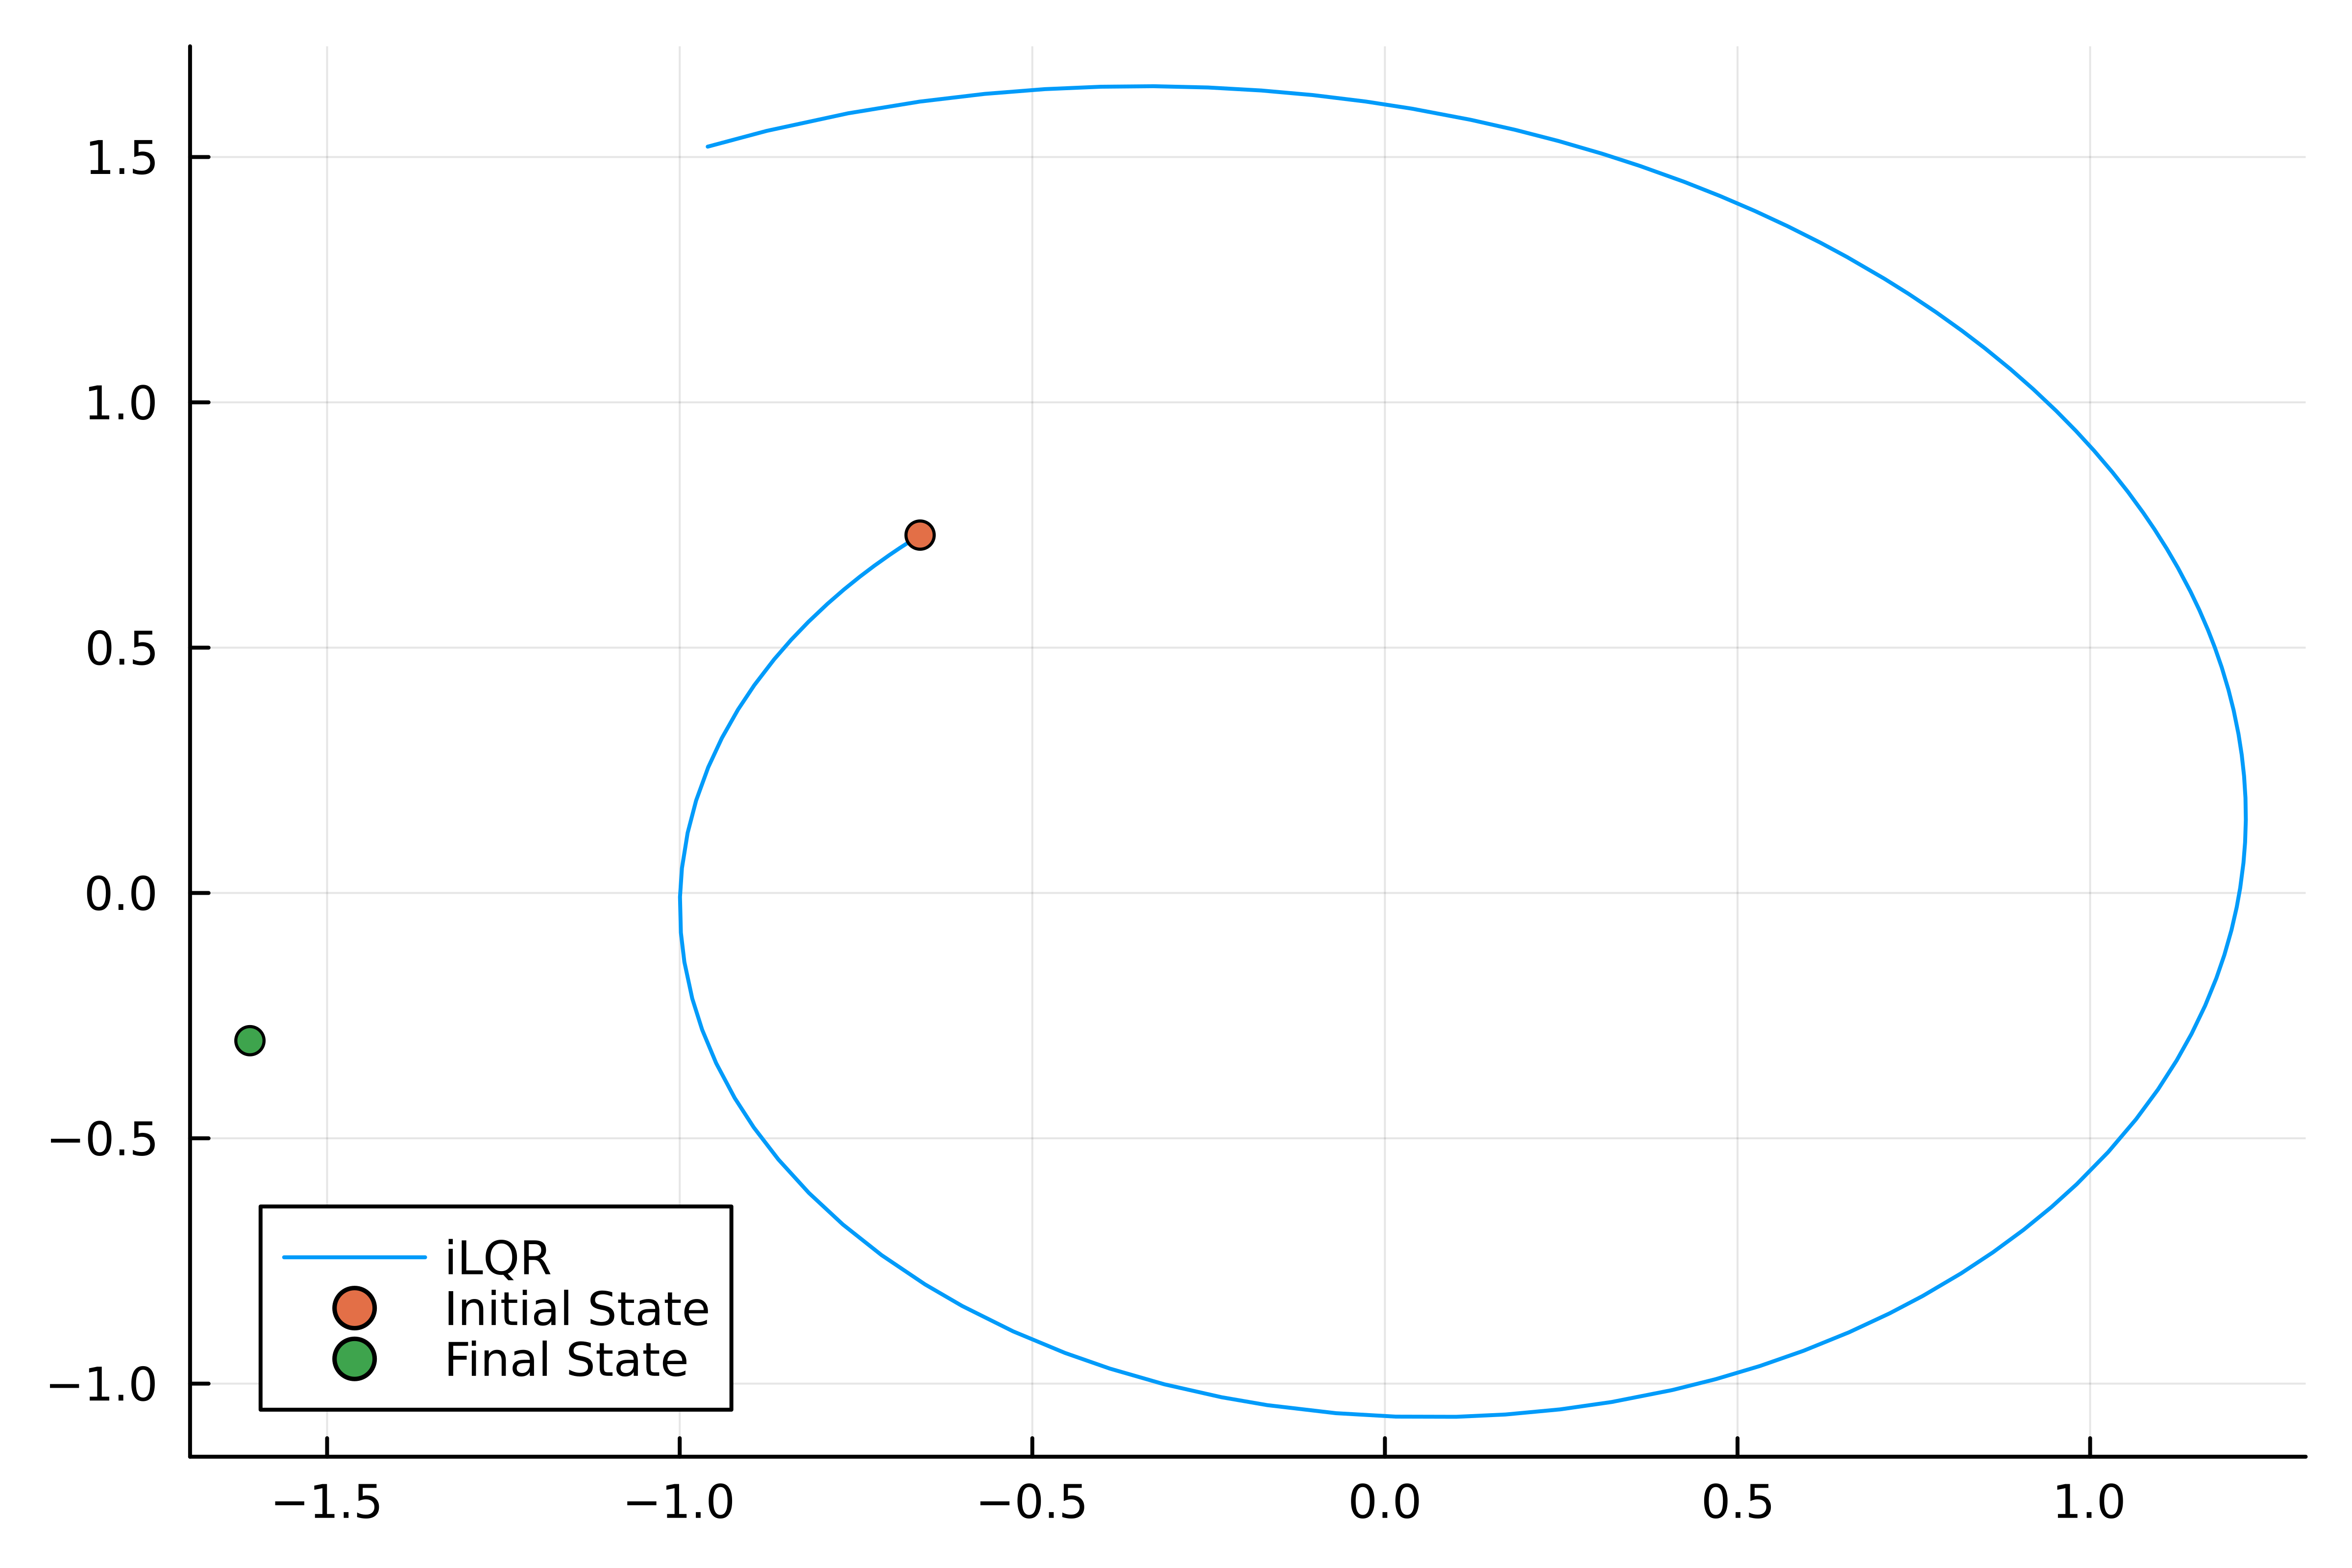

In [51]:
plot(X_ilqr[1,:],X_ilqr[2,:],label="iLQR")
scatter!((x_init[1],x_init[2]),label="Initial State")
scatter!((x_final[1],x_final[2]),label="Final State")

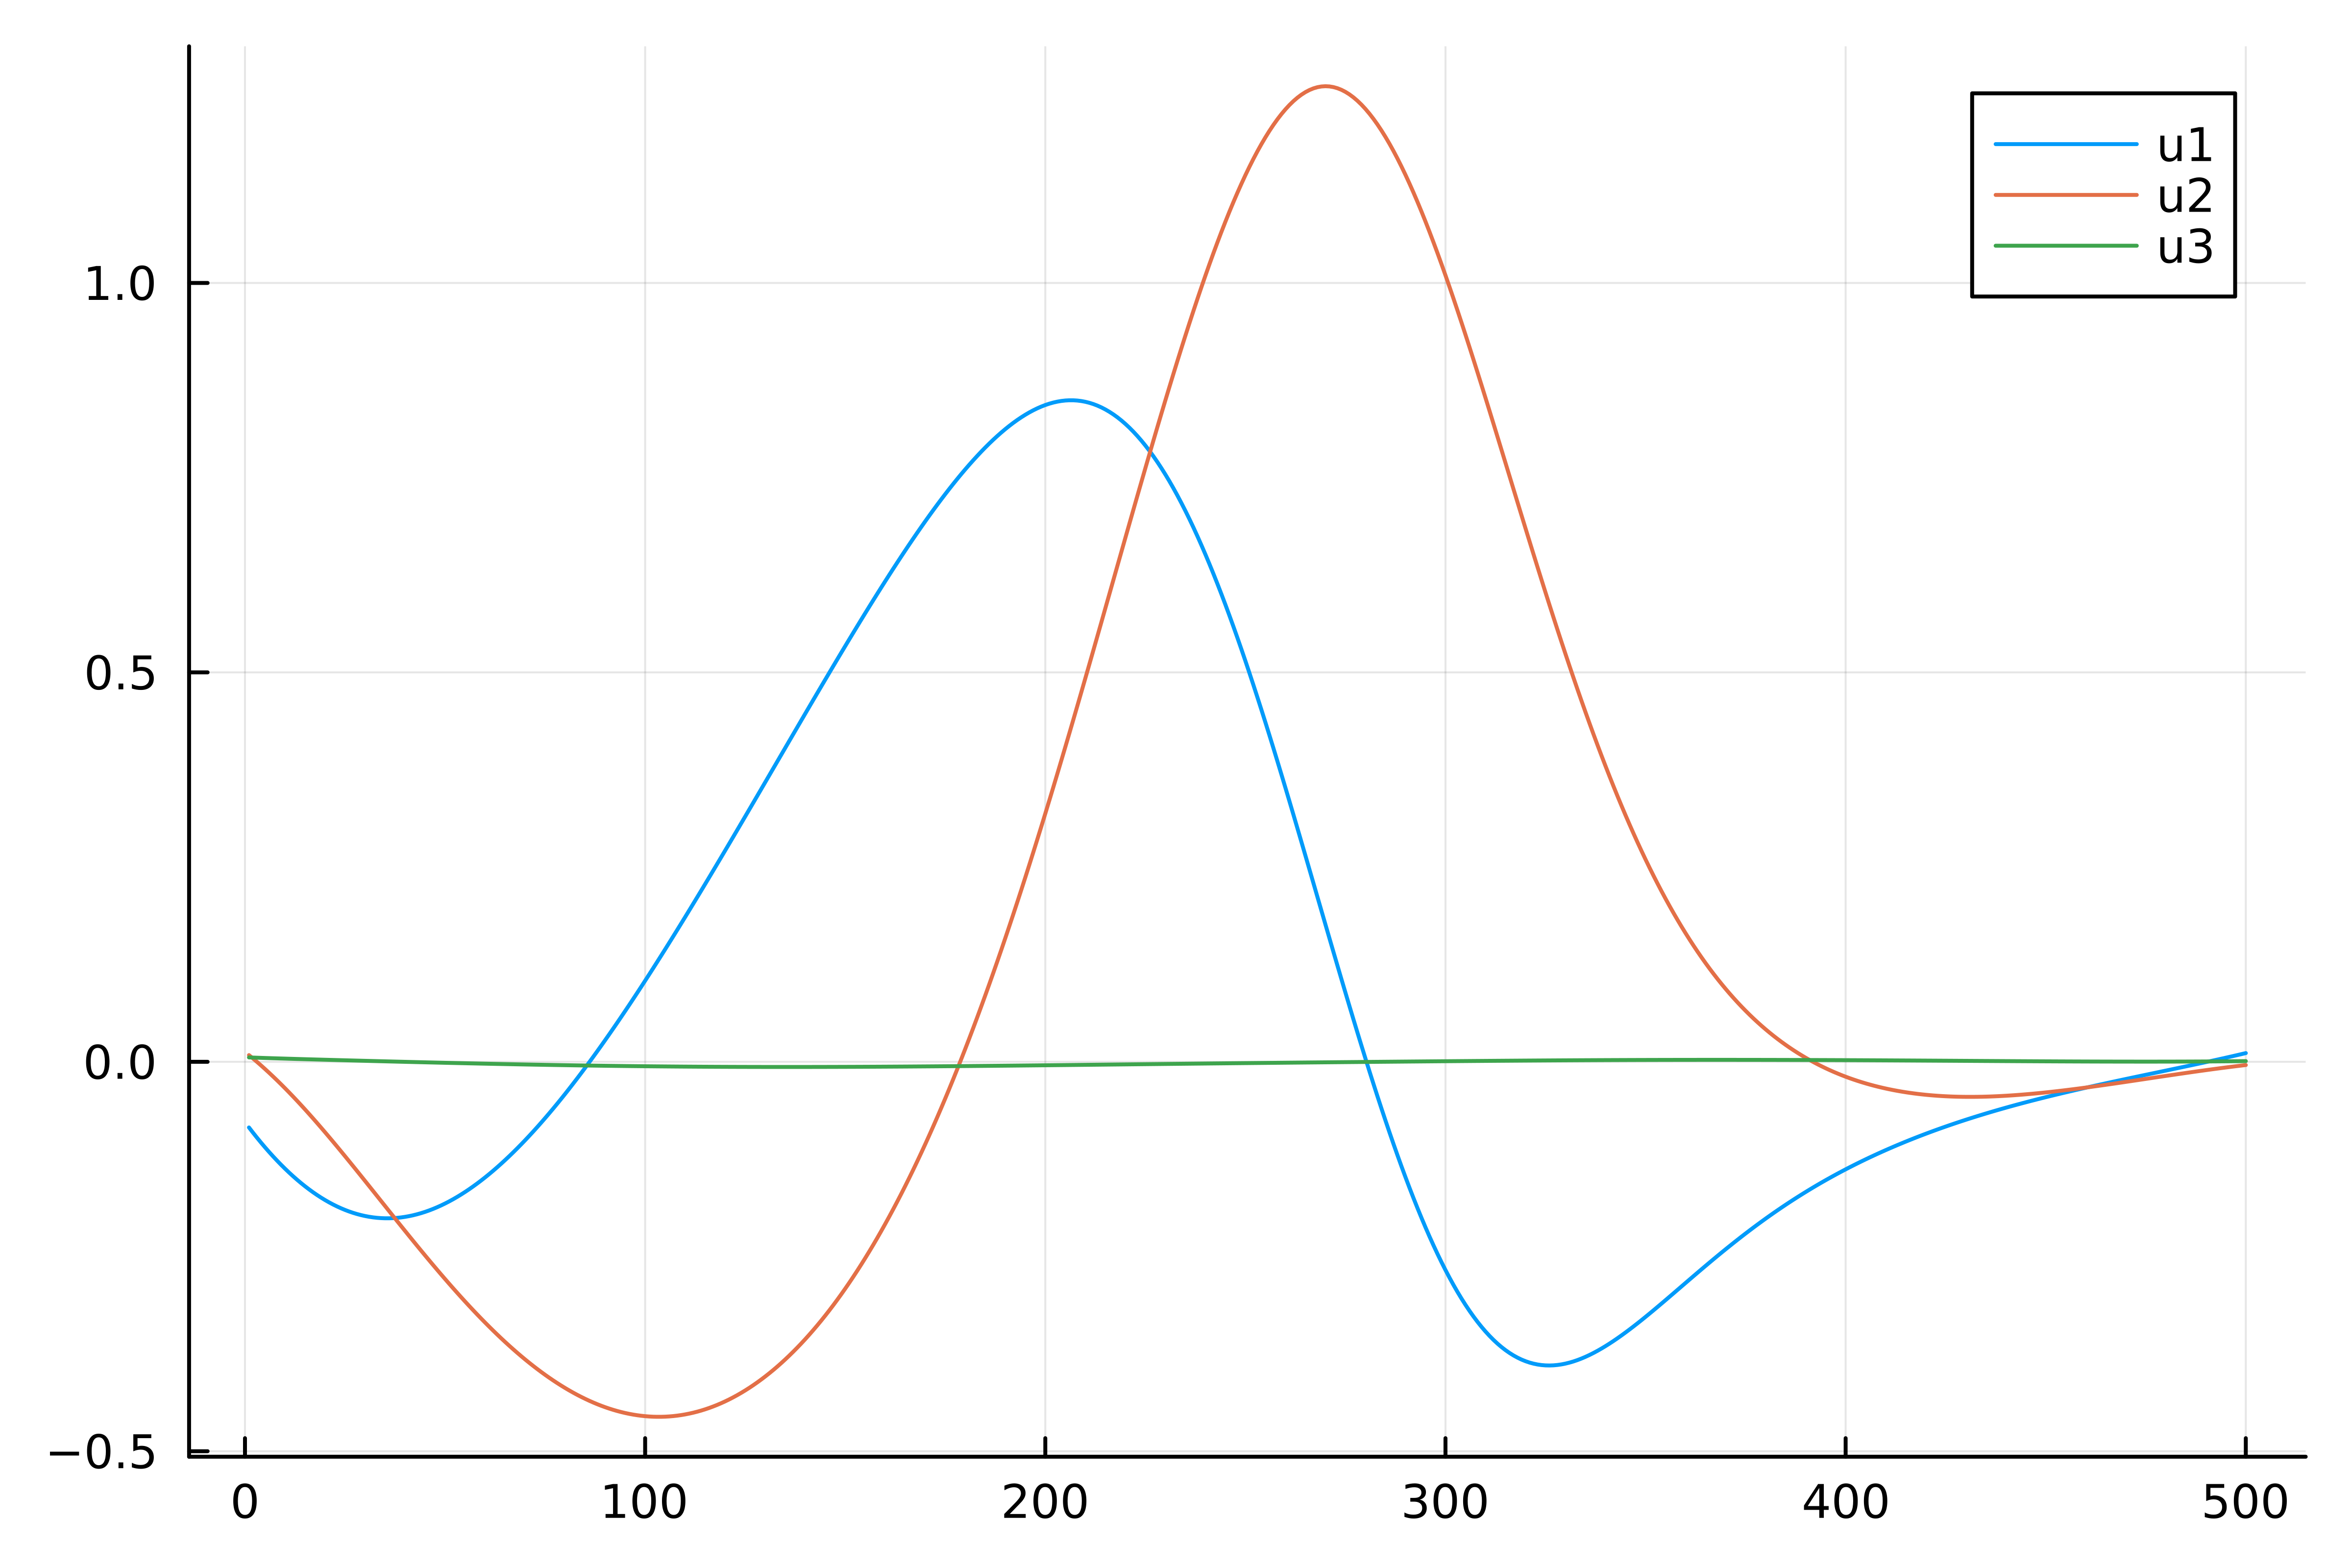

In [9]:
U_arr = zeros(3,tN)
Unorm_arr = zeros(tN)
for k in 0:tN-1
    U_arr[:,k+1] = U_ilqr(k*dt)
    Unorm_arr[k+1] = norm(U_ilqr(k*dt))
end

plot(U_arr[1,:],label="u1")
plot!(U_arr[2,:],label="u2")
plot!(U_arr[3,:],label="u3")


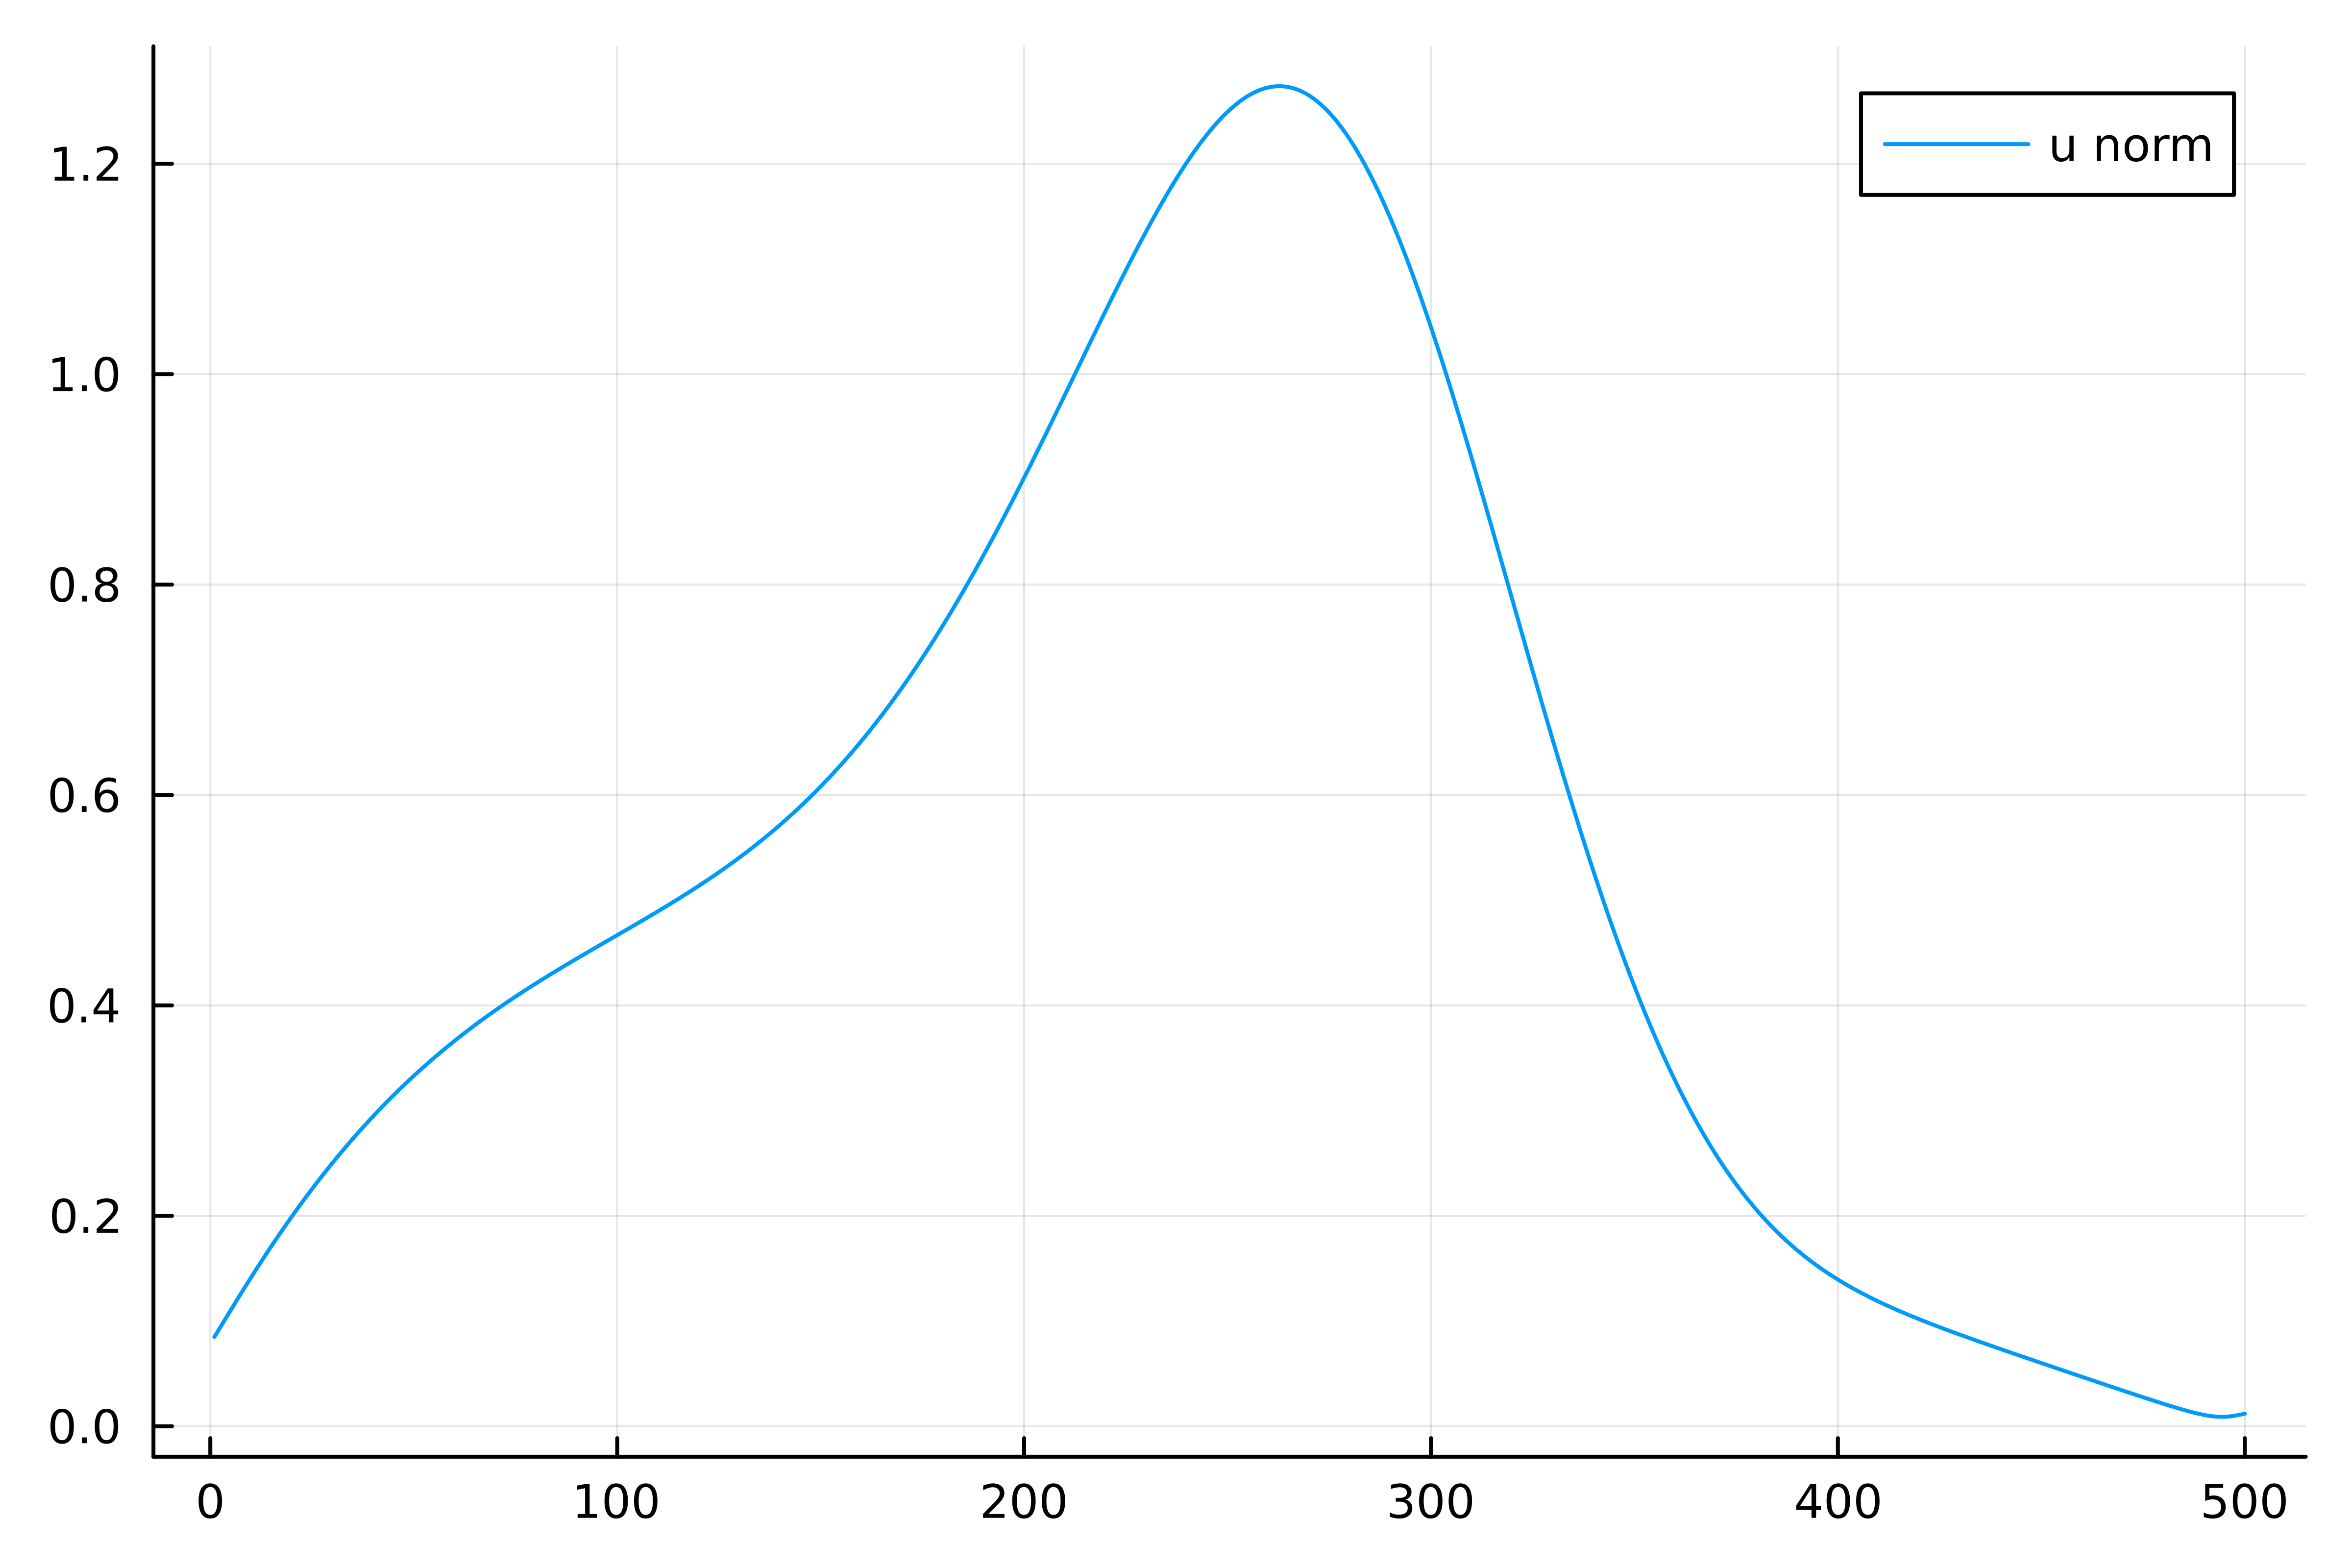

In [53]:
plot(Unorm_arr,label="u norm")

In [18]:
function ell_cost(
    x::Vector,
    u::Vector,
    x_ref::Vector{Float64};
)
    Q = zeros(7, 7)
    R = Diagonal(1e+0*[1; 1; 1])
    return transpose(x - x_ref) * Q * (x - x_ref) + transpose(u) * R * u
end

function phi_cost(
    x::Vector,
    x_final::Vector{Float64};
)
    Qf = Diagonal(1e+0*[1; 1; 1; 1; 1; 1; 1])
    # Qf = Diagonal(1e+4*[1; 1; 1; 1; 1; 1])
    return transpose(x - x_final) * Qf * (x - x_final)
end

prob = DDPProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, x_init, x_final, nothing)
sol = solve_ddp(prob, reg_param1=1e-7,reg_param2=1e-0, max_ite=20)
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains
X_ddp, U_ddp, J_ddp, gains_ddp = sol.X, sol.U, sol.J, sol.gains;


**************************************************************************************
>>> Start DDP Problem Solver 
**************************************************************************************
iter    objective   inf_pr     inf_du   lg(mu)   |d|   lg(rg)  alpha_du   alpha_pr   ls
                
0       2.302211,  
                
1       2.302211,  
                


2       2.302211,  
                
3       2.302211,  
                


4       2.302211,  
                
5       2.302211,  
                


6       2.302211,  
                
7       2.302211,  
                


8       2.302211,  
                
9       2.302211,  
                


iter    objective   inf_pr     inf_du   lg(mu)   |d|   lg(rg)  alpha_du   alpha_pr   ls
                
10       2.302211,  
                


11       2.302211,  
                
12       2.302211,  
                


13       2.302211,  
                
14       2.302211,  
                


15       2.302211,  
                
16       2.302211,  
                


17       2.302211,  
                
18       2.302211,  
                


19       2.302211,  
                
**************************************************************************************
>>> Successfully Finished DDP Problem Solver <<< 
**************************************************************************************


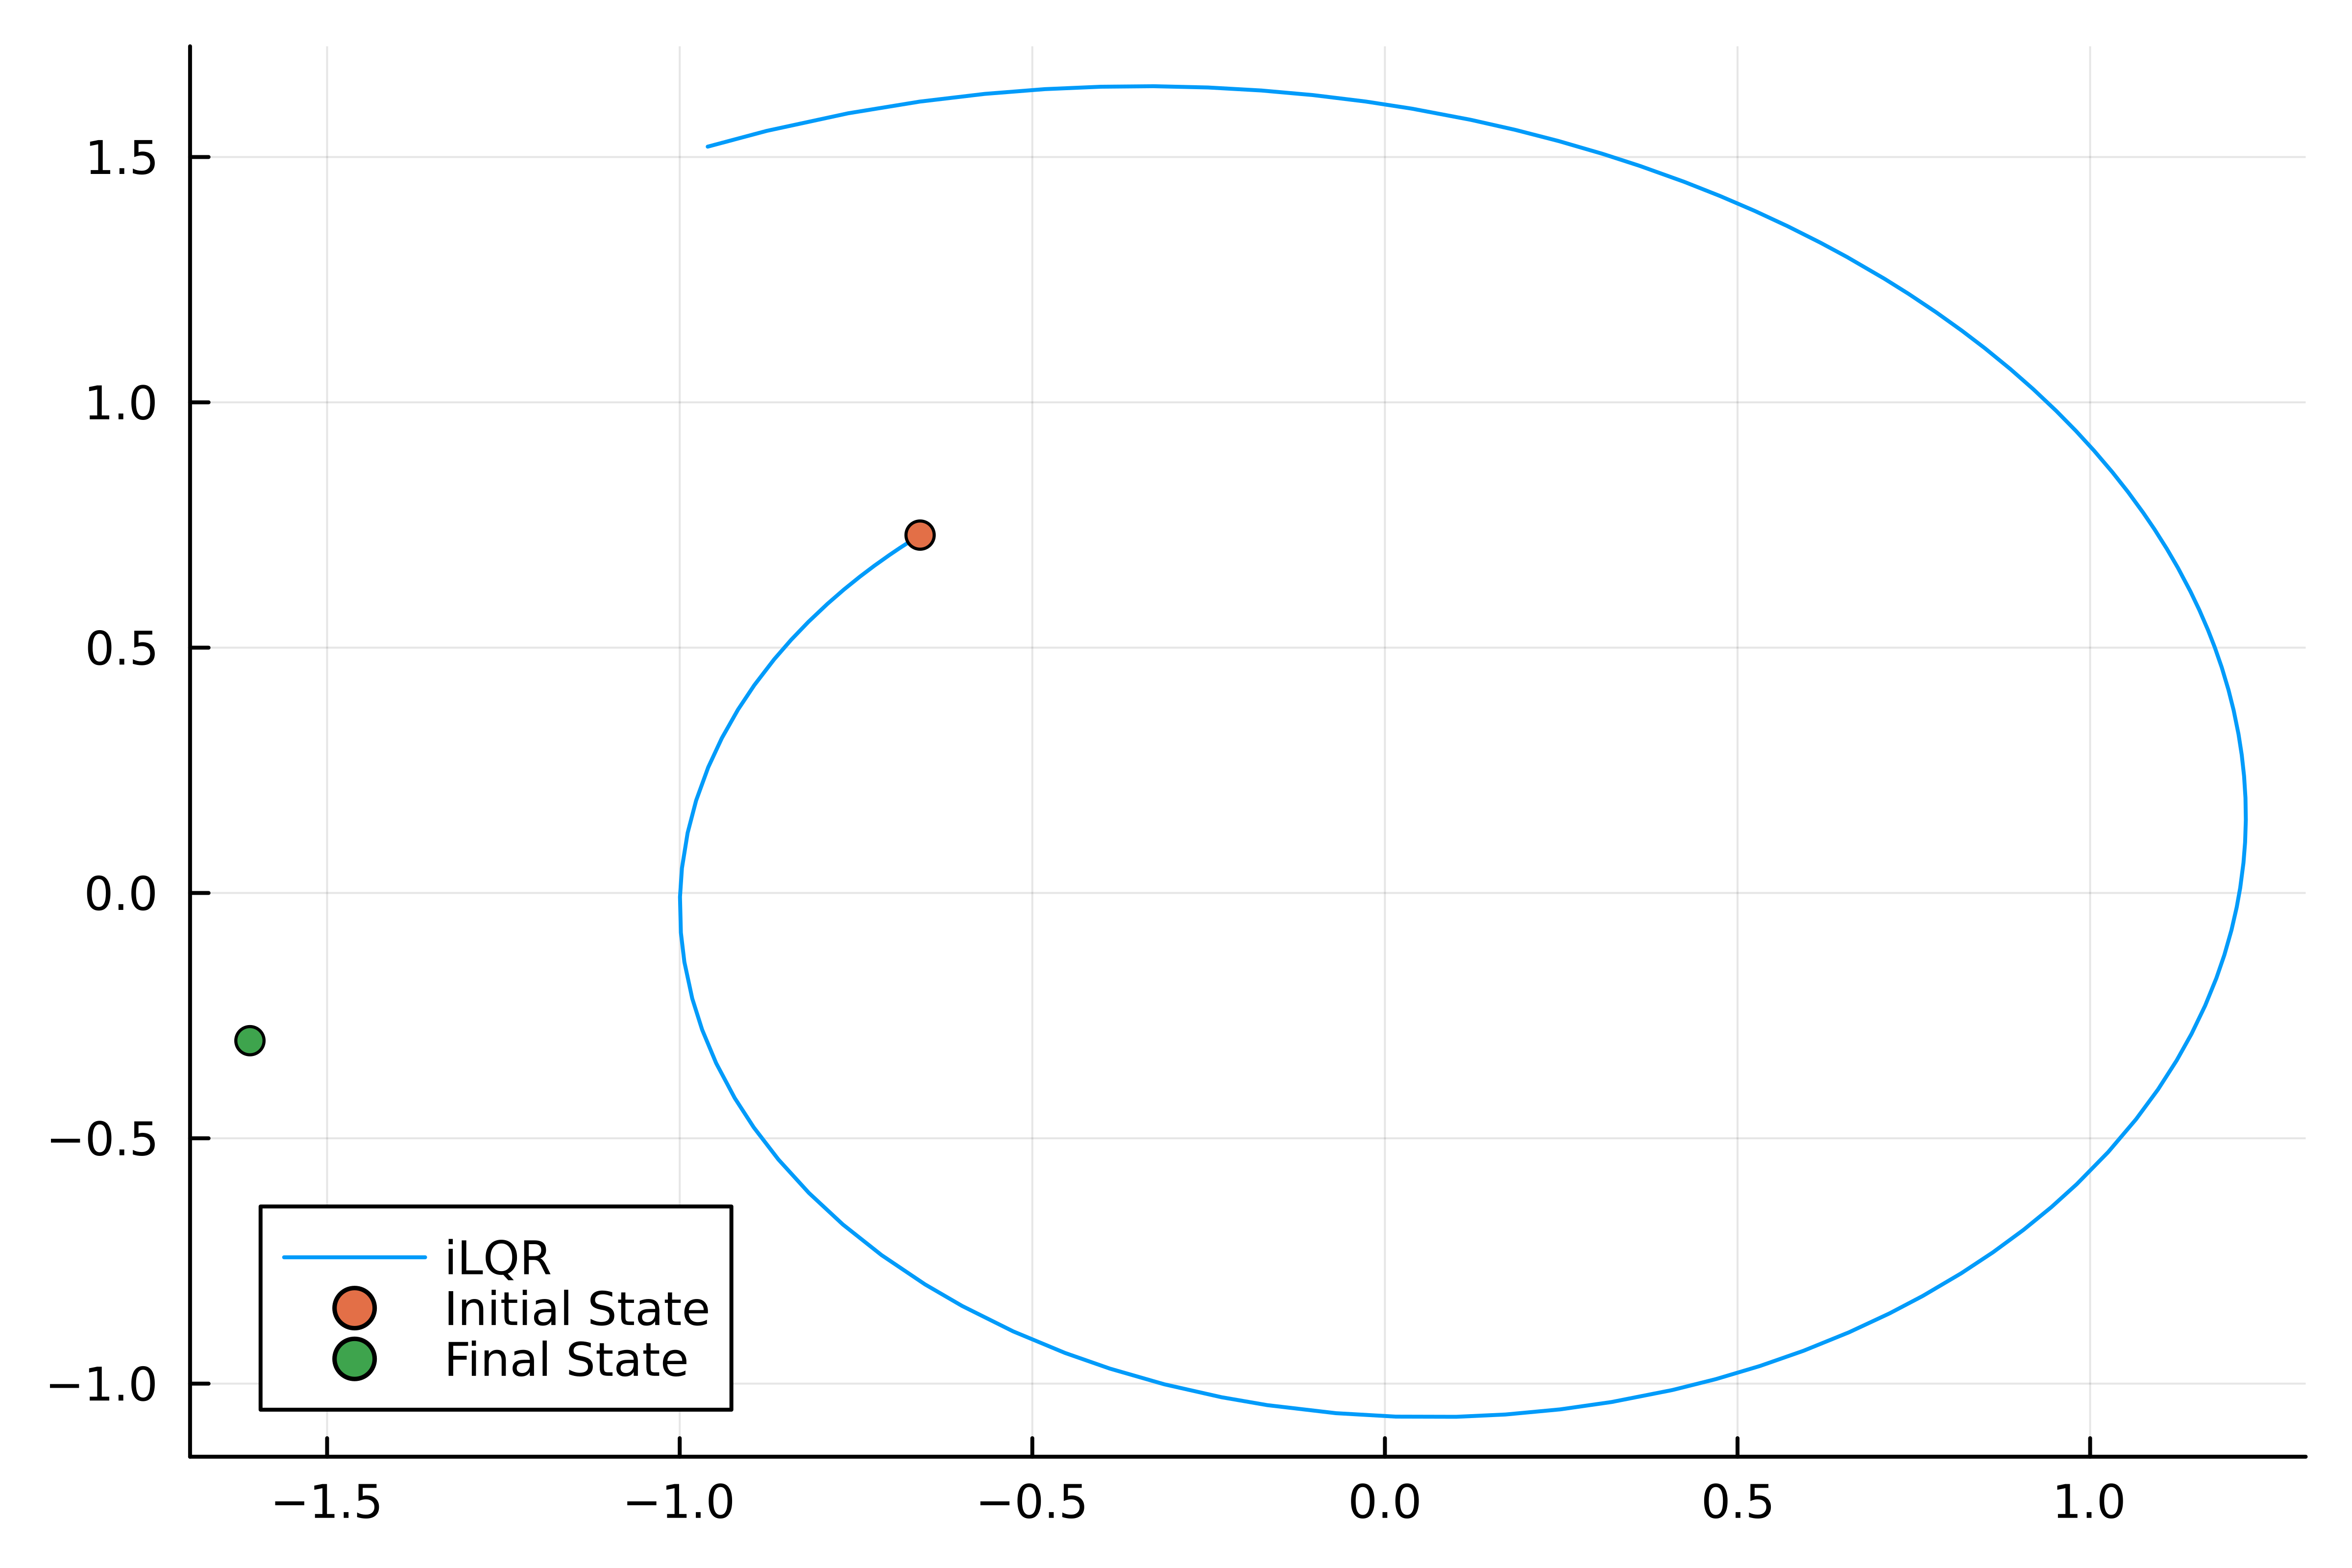

In [19]:
plot(X_ilqr[1,:],X_ilqr[2,:],label="iLQR")
scatter!((x_init[1],x_init[2]),label="Initial State")
scatter!((x_final[1],x_final[2]),label="Final State")